In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [28]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [29]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [30]:
# reflect an existing database into a new model ADDED
Base = automap_base()

# reflect the tables ADDED
Base.prepare(engine, reflect=True)

In [31]:
# View all of the classes that automap found added
Base.classes.keys()

['measurement', 'station']

In [32]:
# Save references to each table added
Measurement = Base.classes.measurement
Station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB added
session = Session(engine)

# Exploratory Precipitation Analysis

In [37]:
# Get a list of column names and types to identify columns
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
#sanity check to see where the last date is located.
measurement_query = session.query(Measurement)
for row in measurement_query:
    print(f"{row.date}, {row.prcp}")

2010-01-01, 0.08
2010-01-02, 0.0
2010-01-03, 0.0
2010-01-04, 0.0
2010-01-06, None
2010-01-07, 0.06
2010-01-08, 0.0
2010-01-09, 0.0
2010-01-10, 0.0
2010-01-11, 0.01
2010-01-12, 0.0
2010-01-14, 0.0
2010-01-15, 0.0
2010-01-16, 0.0
2010-01-17, 0.0
2010-01-18, 0.0
2010-01-19, 0.0
2010-01-20, 0.0
2010-01-21, 0.0
2010-01-22, 0.0
2010-01-23, 0.0
2010-01-24, 0.01
2010-01-25, 0.0
2010-01-26, 0.04
2010-01-27, 0.12
2010-01-28, 0.0
2010-01-30, None
2010-01-31, 0.03
2010-02-01, 0.01
2010-02-03, None
2010-02-04, 0.01
2010-02-05, 0.0
2010-02-06, 0.0
2010-02-07, 0.0
2010-02-08, 0.0
2010-02-09, 0.0
2010-02-11, 0.0
2010-02-12, 0.02
2010-02-13, 0.01
2010-02-14, 0.0
2010-02-15, 0.0
2010-02-16, 0.0
2010-02-17, 0.0
2010-02-19, None
2010-02-20, 0.03
2010-02-21, 0.0
2010-02-22, 0.0
2010-02-23, 0.0
2010-02-24, 0.0
2010-02-25, 0.0
2010-02-26, 0.0
2010-02-28, 0.0
2010-03-01, 0.01
2010-03-02, 0.0
2010-03-03, 0.0
2010-03-04, 0.12
2010-03-05, 0.08
2010-03-06, 0.03
2010-03-07, 0.0
2010-03-08, 0.43
2010-03-09, 0.06
20

2016-12-25, 0.0
2016-12-26, 0.02
2016-12-27, 0.0
2016-12-28, 0.02
2016-12-29, 0.04
2016-12-30, 0.12
2016-12-31, 0.01
2017-01-01, 0.0
2017-01-02, 0.0
2017-01-03, 0.0
2017-01-04, 0.0
2017-01-05, 0.0
2017-01-06, 0.0
2017-01-07, 0.0
2017-01-08, 0.0
2017-01-09, 0.0
2017-01-10, 0.0
2017-01-11, 0.0
2017-01-12, 0.0
2017-01-13, 0.0
2017-01-14, 0.0
2017-01-15, 0.0
2017-01-16, 0.0
2017-01-17, 0.0
2017-01-18, 0.0
2017-01-19, 0.0
2017-01-20, 0.0
2017-01-21, 0.0
2017-01-22, 0.16
2017-01-23, 0.0
2017-01-24, 0.04
2017-01-25, 0.03
2017-01-26, 0.0
2017-01-27, 0.0
2017-01-28, 0.0
2017-01-29, 0.18
2017-01-30, 0.0
2017-01-31, 0.0
2017-02-01, 0.0
2017-02-02, 0.0
2017-02-03, 0.0
2017-02-04, 0.0
2017-02-05, 0.0
2017-02-06, 0.0
2017-02-07, 0.51
2017-02-08, 0.0
2017-02-09, 0.0
2017-02-10, 0.0
2017-02-11, 0.31
2017-02-12, 2.62
2017-02-13, 0.01
2017-02-14, 0.0
2017-02-15, 0.0
2017-02-16, 0.07
2017-02-17, 0.0
2017-02-18, 0.0
2017-02-19, 0.0
2017-02-20, 0.0
2017-02-21, 0.06
2017-02-22, 0.06
2017-02-23, 0.01
2017-02

2015-08-24, 0.23
2015-08-25, 0.52
2015-08-26, 1.03
2015-08-27, 0.0
2015-08-28, 0.0
2015-08-29, 0.25
2015-08-30, 0.0
2015-09-01, 0.32
2015-09-02, 0.28
2015-09-03, 1.55
2015-09-04, 0.0
2015-09-05, 0.0
2015-09-06, 0.71
2015-09-07, 0.19
2015-09-09, None
2015-09-10, 0.06
2015-09-11, 0.09
2015-09-12, 2.7
2015-09-13, 0.16
2015-09-14, 0.63
2015-09-15, 0.56
2015-09-16, 0.06
2015-09-17, 0.06
2015-09-18, 0.08
2015-09-19, 0.0
2015-09-20, 0.07
2015-09-21, 0.07
2015-09-22, 0.32
2015-09-23, 0.3
2015-09-24, 0.01
2015-09-25, 0.0
2015-09-26, 0.36
2015-09-27, 0.18
2015-09-28, 0.17
2015-09-29, 0.07
2015-09-30, 0.17
2015-10-01, 0.0
2015-10-02, 0.02
2015-10-03, 0.0
2015-10-04, 0.0
2015-10-05, 0.4
2015-10-06, 0.22
2015-10-07, 0.22
2015-10-08, 0.05
2015-10-09, 0.03
2015-10-10, 0.11
2015-10-11, 0.09
2015-10-12, 1.0
2015-10-13, 1.7
2015-10-14, 1.21
2015-10-15, 0.81
2015-10-16, 0.73
2015-10-17, 0.1
2015-10-18, 0.03
2015-10-19, 0.18
2015-10-20, 0.2
2015-10-21, 0.02
2015-10-22, 0.0
2015-10-23, 0.03
2015-10-24, 0.0

2015-11-08, None
2015-11-09, 0.2
2015-11-10, 0.04
2015-11-11, 0.0
2015-11-12, 0.02
2015-11-13, 0.17
2015-11-14, 0.2
2015-11-15, 0.02
2015-11-16, 0.01
2015-11-17, 0.0
2015-11-18, 0.31
2015-11-19, 0.01
2015-11-20, 1.92
2015-11-21, 0.58
2015-11-22, 0.12
2015-11-23, 1.75
2015-11-24, 0.08
2015-11-25, 0.01
2015-11-26, 0.27
2015-11-27, 0.66
2015-11-28, 0.05
2015-11-30, None
2015-12-01, 0.0
2015-12-02, 0.0
2015-12-03, 0.17
2015-12-04, 0.03
2015-12-07, None
2015-12-08, 0.05
2015-12-09, 0.02
2015-12-10, 0.12
2015-12-11, 0.03
2015-12-12, 0.17
2015-12-13, 0.0
2015-12-14, 0.05
2015-12-15, 0.0
2015-12-16, 0.05
2015-12-17, 0.13
2015-12-18, 0.08
2015-12-19, 0.18
2015-12-21, None
2015-12-22, 0.13
2015-12-23, 0.1
2015-12-25, None
2015-12-27, None
2015-12-28, 0.21
2015-12-29, 0.01
2016-01-01, 0.0
2016-01-02, 0.05
2016-01-03, 0.0
2016-01-04, 0.0
2016-01-05, 0.1
2016-01-06, 0.04
2016-01-07, 0.03
2016-01-08, 0.0
2016-01-09, 0.0
2016-01-11, None
2016-01-12, 0.32
2016-01-13, 0.0
2016-01-14, 0.0
2016-01-15, 0.

2010-12-02, None
2010-12-03, 0.78
2010-12-05, None
2010-12-06, 0.02
2010-12-07, 0.02
2010-12-08, 0.33
2010-12-09, 1.43
2010-12-10, 2.5
2010-12-11, 1.5
2010-12-13, None
2010-12-14, 0.13
2010-12-15, 0.1
2010-12-16, 0.05
2011-01-04, None
2011-01-05, 0.15
2011-01-06, 0.14
2011-01-07, 0.0
2011-01-10, None
2011-01-11, 0.73
2011-01-12, 1.15
2011-01-13, 6.3
2011-01-14, 0.7
2011-01-18, None
2011-01-19, 0.03
2011-01-20, 0.07
2011-01-21, 0.0
2011-01-24, None
2011-01-25, 0.02
2011-01-26, 0.08
2011-01-27, 0.03
2011-01-28, 0.04
2011-01-31, None
2011-02-01, 0.02
2011-02-02, 0.0
2011-02-03, 0.0
2011-02-04, 0.02
2011-02-07, None
2011-02-09, None
2011-02-10, 0.08
2011-02-11, 1.0
2011-02-14, None
2011-02-15, 0.06
2011-02-16, 0.01
2011-02-17, 0.09
2011-02-18, 0.01
2011-02-22, None
2011-02-23, 0.16
2011-02-24, 0.03
2011-02-25, 0.01
2011-02-28, None
2011-03-01, 0.02
2011-03-02, 0.0
2011-03-03, 0.89
2011-03-04, 1.42
2011-03-07, None
2011-03-08, 0.11
2011-03-09, 0.66
2011-03-10, 0.36
2011-03-21, None
2011-03-

2016-04-17, 0.09
2016-04-18, 0.46
2016-04-20, None
2016-04-21, 0.0
2016-04-22, 0.0
2016-04-23, 0.04
2016-04-24, 0.29
2016-04-25, 0.0
2016-04-26, 0.0
2016-04-27, 0.0
2016-04-28, 0.0
2016-04-29, 0.0
2016-04-30, 0.0
2016-05-01, 0.09
2016-05-02, 0.07
2016-05-03, 0.0
2016-05-04, 0.0
2016-05-05, 0.27
2016-05-06, 0.0
2016-05-07, 1.8
2016-05-08, 0.75
2016-05-09, 0.02
2016-05-10, 0.0
2016-05-11, 0.0
2016-05-12, 0.0
2016-05-13, 0.0
2016-05-14, 0.06
2016-05-15, 0.0
2016-05-16, 0.0
2016-05-17, 0.0
2016-05-18, 0.0
2016-05-19, 0.0
2016-05-20, 0.0
2016-05-21, 0.0
2016-05-22, 0.0
2016-05-23, 0.0
2016-05-24, 0.0
2016-05-25, 0.0
2016-05-26, 0.01
2016-05-27, 0.0
2016-05-28, 0.36
2016-05-29, 0.0
2016-05-30, 0.05
2016-05-31, 1.18
2016-06-01, 0.38
2016-06-02, 0.03
2016-06-03, 0.47
2016-06-04, 0.02
2016-06-05, 0.14
2016-06-06, 0.17
2016-06-07, 0.07
2016-06-08, 0.0
2016-06-09, 0.15
2016-06-10, 0.23
2016-06-11, 0.0
2016-06-12, 0.12
2016-06-13, 0.1
2016-06-14, 0.0
2016-06-15, 0.25
2016-06-17, None
2016-06-18, 0

2015-08-07, 0.02
2015-08-08, 0.16
2015-08-09, 0.06
2015-08-10, 0.04
2015-08-11, 0.04
2015-08-12, 0.01
2015-08-13, 0.07
2015-08-14, 0.43
2015-08-15, 0.18
2015-08-16, 0.04
2015-08-17, 0.24
2015-08-18, 0.89
2015-08-19, 0.03
2015-08-20, 0.0
2015-08-21, 1.62
2015-08-22, 0.03
2015-08-23, 2.86
2015-08-24, 3.62
2015-08-25, 0.31
2015-08-26, 0.6
2015-08-27, 2.96
2015-08-28, 0.05
2015-08-29, 0.01
2015-08-30, 0.05
2015-08-31, 0.02
2015-09-01, 0.3
2015-09-02, 0.01
2015-09-03, 0.0
2015-09-04, 1.35
2015-09-05, 0.0
2015-09-06, 0.0
2015-09-07, 0.97
2015-09-08, 0.74
2015-09-09, 0.0
2015-09-10, 0.09
2015-09-11, 0.69
2015-09-12, 3.1
2015-09-13, 0.26
2015-09-14, 0.52
2015-09-15, 1.61
2015-09-16, 0.41
2015-09-17, 0.07
2015-09-18, 0.42
2015-09-19, 0.07
2015-09-20, 0.25
2015-09-21, 0.63
2015-09-22, 0.37
2015-09-23, 0.48
2015-09-24, 0.11
2015-09-25, 0.2
2015-09-26, 0.49
2015-09-27, 0.45
2015-09-28, 0.77
2015-09-29, 0.8
2015-09-30, 0.14
2015-10-01, 0.0
2015-10-02, 0.06
2015-10-03, 0.0
2015-10-04, 0.09
2015-10-0

2014-12-09, 0.0
2014-12-10, 0.0
2014-12-11, 0.01
2014-12-12, 0.0
2014-12-14, None
2014-12-15, 0.0
2014-12-16, 0.0
2014-12-17, 0.03
2014-12-18, 0.0
2014-12-19, 0.0
2014-12-20, 0.0
2014-12-21, 0.0
2014-12-22, 0.01
2014-12-23, 0.1
2014-12-24, 0.0
2014-12-25, 0.0
2014-12-26, 0.0
2014-12-27, 0.0
2014-12-28, 0.0
2014-12-29, 0.0
2014-12-30, 0.0
2014-12-31, 0.7
2015-01-01, 0.0
2015-01-02, 0.0
2015-01-03, 0.75
2015-01-04, 0.0
2015-01-05, 0.0
2015-01-06, 0.01
2015-01-07, 0.0
2015-01-08, 0.0
2015-01-09, 0.0
2015-01-10, 0.0
2015-01-11, 0.0
2015-01-12, 0.01
2015-01-13, 0.0
2015-01-14, 0.0
2015-01-15, 0.0
2015-01-16, 0.01
2015-01-17, 0.03
2015-01-18, 0.0
2015-01-19, 0.0
2015-01-20, 0.0
2015-01-21, 0.0
2015-01-22, 0.0
2015-01-23, 0.0
2015-01-24, 0.0
2015-01-25, 0.0
2015-01-26, 0.0
2015-01-27, 0.0
2015-01-28, 0.0
2015-01-29, 0.01
2015-01-30, 0.07
2015-01-31, 0.0
2015-02-01, 0.0
2015-02-03, 0.0
2015-02-05, None
2015-02-06, 0.0
2015-02-07, 0.0
2015-02-08, 0.0
2015-02-09, 0.0
2015-02-10, 0.08
2015-02-11,

2016-09-18, 0.42
2016-09-19, 0.25
2016-09-20, 0.43
2016-09-21, 1.02
2016-09-22, 0.75
2016-09-23, 0.33
2016-09-24, 0.27
2016-09-25, 0.04
2016-09-26, 1.02
2016-09-27, 1.0
2016-09-28, 0.05
2016-09-29, 1.49
2016-09-30, 0.38
2016-10-01, 1.02
2016-10-02, 0.61
2016-10-03, 0.46
2016-10-04, 3.46
2016-10-05, 0.81
2016-10-06, 0.04
2016-10-07, 0.01
2016-10-08, 0.04
2016-10-09, 0.0
2016-10-10, 0.0
2016-10-11, 0.35
2016-10-12, 0.02
2016-10-13, 0.06
2016-10-14, 0.0
2016-10-15, 0.33
2016-10-16, 0.0
2016-10-17, 0.38
2016-10-18, 0.48
2016-10-19, 0.0
2016-10-20, 1.0
2016-10-21, 0.09
2016-10-22, 1.37
2016-10-23, 0.24
2016-10-24, 0.7
2016-10-25, 0.4
2016-10-26, 0.0
2016-10-27, 1.25
2016-10-28, 0.37
2016-10-29, 0.25
2016-10-30, 0.95
2016-10-31, 1.35
2016-11-01, 0.09
2016-11-02, 0.04
2016-11-03, 0.02
2016-11-04, 0.06
2016-11-05, 0.38
2016-11-06, 0.05
2016-11-07, 0.05
2016-11-08, 0.53
2016-11-09, 0.04
2016-11-10, 0.01
2016-11-11, 0.0
2016-11-12, 0.0
2016-11-13, 0.0
2016-11-14, 0.02
2016-11-15, 0.05
2016-11-16

In [146]:
# Find the most recent date in the data set. But I realize this is in a form of row.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# to put into calculation.
last_date = session.query(func.max(Measurement.date)).scalar()
last_date

'2017-08-23'

In [65]:
# Starting from the most recent data point in the database.
measurement_rearranged = session.query(Measurement).order_by(Measurement.date.desc())
for row in measurement_rearranged:
    print(f"{row.date}, {row.prcp}")

2017-08-23, 0.0
2017-08-23, 0.0
2017-08-23, 0.08
2017-08-23, 0.45
2017-08-22, 0.0
2017-08-22, 0.0
2017-08-22, 0.5
2017-08-21, 0.0
2017-08-21, 0.02
2017-08-21, None
2017-08-21, 0.56
2017-08-20, 0.0
2017-08-20, 0.01
2017-08-20, None
2017-08-19, 0.0
2017-08-19, 0.0
2017-08-19, None
2017-08-19, 0.09
2017-08-18, 0.0
2017-08-18, 0.0
2017-08-18, 0.06
2017-08-18, None
2017-08-17, 0.0
2017-08-17, 0.05
2017-08-17, 0.01
2017-08-17, 0.13
2017-08-16, 0.0
2017-08-16, 0.07
2017-08-16, 0.12
2017-08-16, 0.42
2017-08-15, 0.02
2017-08-15, 0.0
2017-08-15, 0.06
2017-08-15, 0.32
2017-08-15, 0.42
2017-08-14, 0.0
2017-08-14, 0.01
2017-08-14, 0.08
2017-08-14, 0.0
2017-08-14, 0.22
2017-08-13, 0.0
2017-08-13, None
2017-08-13, 0.0
2017-08-13, 0.0
2017-08-13, None
2017-08-12, 0.0
2017-08-12, 0.0
2017-08-12, 0.14
2017-08-11, 0.0
2017-08-11, 0.0
2017-08-11, 0.0
2017-08-11, None
2017-08-10, 0.0
2017-08-10, 0.0
2017-08-10, 0.0
2017-08-10, 0.07
2017-08-09, 0.0
2017-08-09, 0.0
2017-08-09, 0.15
2017-08-08, 0.0
2017-08-08

2016-08-19, 0.0
2016-08-19, 0.31
2016-08-19, 2.3
2016-08-18, 0.0
2016-08-18, 0.0
2016-08-18, 0.01
2016-08-18, 0.0
2016-08-18, 0.0
2016-08-18, 0.0
2016-08-18, 0.21
2016-08-17, 0.0
2016-08-17, 0.0
2016-08-17, 0.0
2016-08-17, 0.0
2016-08-17, 0.0
2016-08-17, 0.31
2016-08-17, 0.3
2016-08-16, 0.0
2016-08-16, 0.1
2016-08-16, 0.02
2016-08-16, 0.0
2016-08-16, 0.0
2016-08-16, 0.12
2016-08-16, 0.85
2016-08-15, 0.0
2016-08-15, 0.17
2016-08-15, None
2016-08-15, None
2016-08-15, 0.0
2016-08-15, 0.23
2016-08-15, 0.95
2016-08-14, 0.0
2016-08-14, 0.17
2016-08-14, 0.0
2016-08-14, 0.1
2016-08-14, 0.75
2016-08-13, 0.0
2016-08-13, 0.0
2016-08-13, 0.0
2016-08-13, 0.01
2016-08-13, 0.08
2016-08-13, 0.45
2016-08-12, 0.0
2016-08-12, 0.05
2016-08-12, 0.12
2016-08-12, None
2016-08-12, 0.0
2016-08-12, 0.02
2016-08-12, 0.39
2016-08-11, 0.0
2016-08-11, 0.04
2016-08-11, 0.0
2016-08-11, None
2016-08-11, 0.0
2016-08-11, 0.01
2016-08-11, 0.04
2016-08-10, 0.0
2016-08-10, 0.0
2016-08-10, 0.0
2016-08-10, None
2016-08-10, 0

2015-09-14, None
2015-09-14, 2.57
2015-09-13, 0.11
2015-09-13, 0.16
2015-09-13, 0.07
2015-09-13, 0.26
2015-09-13, 0.79
2015-09-12, 0.5
2015-09-12, 2.7
2015-09-12, 2.28
2015-09-12, 3.1
2015-09-12, 2.44
2015-09-11, 0.77
2015-09-11, 0.09
2015-09-11, None
2015-09-11, 0.2
2015-09-11, 0.55
2015-09-11, 0.69
2015-09-11, 0.52
2015-09-10, 0.0
2015-09-10, 0.06
2015-09-10, 0.0
2015-09-10, 0.0
2015-09-10, 0.09
2015-09-10, 0.0
2015-09-09, 0.0
2015-09-09, None
2015-09-09, 0.0
2015-09-09, 0.0
2015-09-09, 0.0
2015-09-09, 0.0
2015-09-08, 0.01
2015-09-08, 0.4
2015-09-08, None
2015-09-08, 1.16
2015-09-08, 0.74
2015-09-08, 0.29
2015-09-07, 0.06
2015-09-07, 0.19
2015-09-07, None
2015-09-07, 0.48
2015-09-07, 0.97
2015-09-07, 0.32
2015-09-06, 0.0
2015-09-06, 0.71
2015-09-06, None
2015-09-06, 0.0
2015-09-06, 0.02
2015-09-05, 0.08
2015-09-05, 0.0
2015-09-05, 0.0
2015-09-05, 0.0
2015-09-05, 0.06
2015-09-04, 0.52
2015-09-04, 0.0
2015-09-04, 0.24
2015-09-04, None
2015-09-04, 0.81
2015-09-04, 1.35
2015-09-04, 0.7
2

2014-09-08, 0.0
2014-09-08, None
2014-09-08, 0.0
2014-09-08, 0.0
2014-09-08, 0.0
2014-09-07, 0.0
2014-09-07, 0.29
2014-09-07, None
2014-09-07, 0.0
2014-09-07, 0.01
2014-09-07, 0.0
2014-09-07, 0.14
2014-09-06, 0.22
2014-09-06, 0.61
2014-09-06, 0.0
2014-09-06, 0.93
2014-09-05, 0.39
2014-09-05, 0.09
2014-09-05, None
2014-09-05, 0.09
2014-09-05, 0.06
2014-09-05, 0.0
2014-09-05, 0.44
2014-09-04, 0.04
2014-09-04, 0.01
2014-09-04, 0.0
2014-09-04, 0.04
2014-09-04, 0.0
2014-09-04, 0.0
2014-09-04, 0.24
2014-09-03, 0.0
2014-09-03, 0.02
2014-09-03, 0.0
2014-09-03, 0.0
2014-09-03, 0.0
2014-09-03, 0.02
2014-09-03, 0.0
2014-09-03, 0.03
2014-09-02, 0.0
2014-09-02, 1.37
2014-09-02, 0.47
2014-09-02, 0.0
2014-09-02, 0.39
2014-09-02, 2.29
2014-09-02, 0.0
2014-09-02, 0.06
2014-09-01, 0.0
2014-09-01, 0.02
2014-09-01, None
2014-09-01, 0.0
2014-09-01, 0.0
2014-09-01, 0.0
2014-09-01, 0.01
2014-08-31, 0.0
2014-08-31, 0.01
2014-08-31, 0.0
2014-08-31, 0.0
2014-08-31, 0.0
2014-08-31, None
2014-08-30, 0.0
2014-08-3

2013-09-27, 0.0
2013-09-27, 0.0
2013-09-27, 0.0
2013-09-27, 0.03
2013-09-27, 0.02
2013-09-27, 0.01
2013-09-27, 0.04
2013-09-27, None
2013-09-26, 0.07
2013-09-26, 0.05
2013-09-26, 0.19
2013-09-26, 0.2
2013-09-26, 0.49
2013-09-26, 0.42
2013-09-26, 0.01
2013-09-25, 0.25
2013-09-25, 0.09
2013-09-25, 0.12
2013-09-25, None
2013-09-25, 0.09
2013-09-25, 0.1
2013-09-25, 0.77
2013-09-24, 0.01
2013-09-24, 0.1
2013-09-24, 0.17
2013-09-24, 0.08
2013-09-24, 0.0
2013-09-24, 0.07
2013-09-23, 0.01
2013-09-23, 0.03
2013-09-23, 0.04
2013-09-23, 0.0
2013-09-23, 0.02
2013-09-23, 0.0
2013-09-23, 0.29
2013-09-22, 0.02
2013-09-22, 0.07
2013-09-22, None
2013-09-22, None
2013-09-22, 0.22
2013-09-22, 0.0
2013-09-22, 0.22
2013-09-21, 0.02
2013-09-21, 0.02
2013-09-21, 0.01
2013-09-21, 0.0
2013-09-21, 0.01
2013-09-20, 0.0
2013-09-20, 0.01
2013-09-20, 0.0
2013-09-20, 0.0
2013-09-20, 0.0
2013-09-20, 0.0
2013-09-20, 0.0
2013-09-20, 0.0
2013-09-19, 0.02
2013-09-19, 0.06
2013-09-19, 0.0
2013-09-19, None
2013-09-19, None

2012-10-19, None
2012-10-18, 0.0
2012-10-18, 0.0
2012-10-18, 0.06
2012-10-18, 0.02
2012-10-18, 0.14
2012-10-18, 0.03
2012-10-18, 0.0
2012-10-17, 0.0
2012-10-17, 0.0
2012-10-17, 0.14
2012-10-17, 0.0
2012-10-17, 0.0
2012-10-17, 0.23
2012-10-17, 0.0
2012-10-16, 0.0
2012-10-16, 0.07
2012-10-16, 0.01
2012-10-16, 0.11
2012-10-16, 0.0
2012-10-16, 0.03
2012-10-16, 0.0
2012-10-15, 0.02
2012-10-15, 0.09
2012-10-15, 0.06
2012-10-15, None
2012-10-15, 0.2
2012-10-15, 0.23
2012-10-15, 0.02
2012-10-14, 0.0
2012-10-14, 0.07
2012-10-14, None
2012-10-14, 0.0
2012-10-14, 0.04
2012-10-14, 0.02
2012-10-13, 0.0
2012-10-13, 0.0
2012-10-13, 0.0
2012-10-13, 0.0
2012-10-13, 0.0
2012-10-12, 0.0
2012-10-12, 0.0
2012-10-12, 0.0
2012-10-12, 0.01
2012-10-12, 0.0
2012-10-12, 0.0
2012-10-12, 0.0
2012-10-12, 0.0
2012-10-11, 0.0
2012-10-11, 0.22
2012-10-11, 0.0
2012-10-11, 0.08
2012-10-11, 0.03
2012-10-11, 0.05
2012-10-11, 0.0
2012-10-11, 0.4
2012-10-10, 0.0
2012-10-10, 0.0
2012-10-10, 0.0
2012-10-10, None
2012-10-10, 0

2011-11-08, 0.08
2011-11-08, 0.0
2011-11-08, 0.27
2011-11-07, 0.0
2011-11-07, 0.0
2011-11-07, None
2011-11-07, None
2011-11-07, 0.0
2011-11-07, 0.05
2011-11-07, 0.0
2011-11-07, 0.11
2011-11-06, 0.0
2011-11-06, 0.01
2011-11-06, 0.0
2011-11-06, 0.12
2011-11-06, 0.1
2011-11-05, 0.0
2011-11-05, 0.06
2011-11-05, 0.06
2011-11-05, 0.0
2011-11-05, 0.1
2011-11-05, 0.0
2011-11-05, 0.17
2011-11-04, 0.01
2011-11-04, 0.62
2011-11-04, 0.4
2011-11-04, None
2011-11-04, 0.6
2011-11-04, 0.05
2011-11-04, 1.27
2011-11-04, 0.0
2011-11-04, 1.06
2011-11-03, 0.02
2011-11-03, 0.19
2011-11-03, 0.12
2011-11-03, None
2011-11-03, 0.02
2011-11-03, 0.29
2011-11-03, 0.02
2011-11-03, 0.58
2011-11-02, 0.28
2011-11-02, 0.1
2011-11-02, 0.12
2011-11-02, 0.03
2011-11-02, 0.03
2011-11-02, 0.26
2011-11-02, 0.93
2011-11-01, 0.58
2011-11-01, 0.8
2011-11-01, 0.7
2011-11-01, 0.54
2011-11-01, 1.68
2011-11-01, 0.08
2011-11-01, 2.24
2011-10-31, 0.03
2011-10-31, 0.33
2011-10-31, 0.39
2011-10-31, None
2011-10-31, 0.0
2011-10-31, 0.55

2010-12-10, 2.02
2010-12-10, 1.72
2010-12-10, 1.8
2010-12-10, 1.86
2010-12-09, 0.0
2010-12-09, 0.0
2010-12-09, 0.12
2010-12-09, 0.02
2010-12-09, 1.43
2010-12-09, 0.03
2010-12-09, 0.07
2010-12-09, 0.04
2010-12-09, 0.0
2010-12-08, 0.0
2010-12-08, 0.0
2010-12-08, 0.0
2010-12-08, 0.0
2010-12-08, 0.33
2010-12-08, 0.15
2010-12-08, 0.0
2010-12-08, 0.0
2010-12-08, 0.0
2010-12-07, 0.0
2010-12-07, 0.0
2010-12-07, 0.0
2010-12-07, 0.0
2010-12-07, 0.02
2010-12-07, 0.0
2010-12-07, 0.0
2010-12-07, 0.0
2010-12-07, 0.0
2010-12-06, 0.0
2010-12-06, 0.0
2010-12-06, 0.0
2010-12-06, 0.0
2010-12-06, 0.02
2010-12-06, 0.0
2010-12-06, 0.0
2010-12-06, 0.0
2010-12-06, 0.0
2010-12-05, 0.0
2010-12-05, 0.0
2010-12-05, None
2010-12-05, 0.0
2010-12-05, 0.0
2010-12-05, 0.0
2010-12-05, 0.0
2010-12-04, 0.0
2010-12-04, 0.0
2010-12-04, 0.0
2010-12-04, 0.0
2010-12-04, 0.0
2010-12-04, 0.0
2010-12-04, 0.19
2010-12-03, 0.0
2010-12-03, 0.16
2010-12-03, 0.22
2010-12-03, 0.78
2010-12-03, 0.01
2010-12-03, 0.47
2010-12-03, 0.01
201

2010-01-20, 0.0
2010-01-20, 0.0
2010-01-19, 0.0
2010-01-19, 0.0
2010-01-19, 0.0
2010-01-19, 0.0
2010-01-19, 0.0
2010-01-19, 0.0
2010-01-19, 0.0
2010-01-18, 0.0
2010-01-18, 0.0
2010-01-18, None
2010-01-18, 0.0
2010-01-18, 0.0
2010-01-18, 0.0
2010-01-18, 0.0
2010-01-17, 0.0
2010-01-17, 0.0
2010-01-17, 0.0
2010-01-17, 0.0
2010-01-17, 0.0
2010-01-16, 0.0
2010-01-16, 0.0
2010-01-16, 0.0
2010-01-16, 0.0
2010-01-16, 0.0
2010-01-16, 0.0
2010-01-15, 0.0
2010-01-15, 0.0
2010-01-15, 0.0
2010-01-15, 0.0
2010-01-15, 0.0
2010-01-15, 0.0
2010-01-14, 0.0
2010-01-14, 0.0
2010-01-14, 0.0
2010-01-14, 0.0
2010-01-14, 0.0
2010-01-14, 0.0
2010-01-14, 0.0
2010-01-13, 0.0
2010-01-13, 0.02
2010-01-13, 0.0
2010-01-13, 0.0
2010-01-13, 0.0
2010-01-13, 0.0
2010-01-12, 0.0
2010-01-12, 0.0
2010-01-12, 0.02
2010-01-12, 0.0
2010-01-12, 0.0
2010-01-12, 0.0
2010-01-12, 0.0
2010-01-11, 0.01
2010-01-11, 0.03
2010-01-11, 0.14
2010-01-11, 0.48
2010-01-11, 0.03
2010-01-11, 0.05
2010-01-11, 0.14
2010-01-10, 0.0
2010-01-10, 0.

In [128]:
# Calculate the date one year from the last date in data set.
query_one_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
query_date = query_one_year.strftime('%Y-%m-%d')
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [129]:
# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()
last_year

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [130]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year)
last_year_index_date_df = last_year_df.set_index("date")
last_year_index_date_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [131]:
# Sort the dataframe by date
last_year_sorted_df = last_year_index_date_df.sort_values(['date'])
last_year_sorted_df.dropna(inplace = True)
last_year_sorted_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70
2016-08-23,0.02
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


In [132]:
#sanity check
last_year_2016_08_23_df = last_year_df.loc[  last_year_df['date'] == '2016-08-23']
last_year_2016_08_23_df.count()

date    7
prcp    6
dtype: int64

In [141]:
#Declaration of x and y axis.
#x-axis
dates_df = last_year_df.sort_values(['date'])
dates = dates_df['date']
dates

#y-axis
precipitation = last_year_sorted_df['prcp']
precipitation

date
2016-08-23    0.00
2016-08-23    1.79
2016-08-23    0.05
2016-08-23    0.15
2016-08-23    0.70
              ... 
2017-08-22    0.00
2017-08-23    0.00
2017-08-23    0.00
2017-08-23    0.08
2017-08-23    0.45
Name: prcp, Length: 2021, dtype: float64

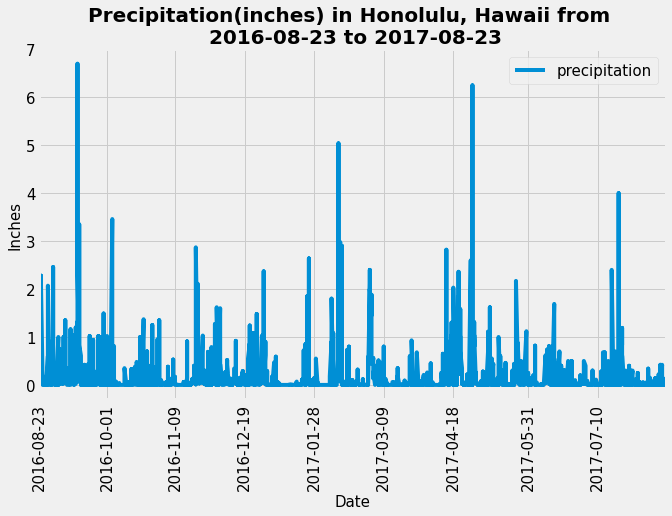

In [293]:
# Use Pandas Plotting with Matplotlib to plot the data. note to myself: doesnt work --> plt.plot(dates, precipitation) not the same first dimension.
plt.figure(figsize=(10, 6))
plt.plot(precipitation.index, precipitation)

# Legend
plt.legend(['precipitation'], loc="upper right", fontsize=15)

# set x location
x_axis = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', 
          '2017-03-09', '2017-04-18','2017-05-31','2017-07-10']

# Assign x-ticks
plt.xticks(x_axis, rotation='vertical',fontsize=15)

# Set Labels & Title
plt.xlabel('Date', fontsize=15)
plt.ylabel("Inches",fontsize=15)
plt.title(f"Precipitation(inches) in Honolulu, Hawaii from \n {query_date} to {last_date}",fontsize=20, fontweight = 'bold')
plt.yticks(size=15)

# Set x and y limits
plt.xlim(0,360)
plt.ylim(-0.3,7)


# Save Figure
plt.savefig("Images/precipitation_plot.png", bbox_inches = 'tight')
# Show plot
plt.show()

In [147]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_sorted_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [191]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [192]:
# Get a list of column names and types to identify columns
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [219]:
sel = [Station.station, Station.name, Measurement.station, func.count(Measurement.station).label('station_count')]
sel

In [232]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_group_count = session.query(*sel).filter(Station.station == Measurement.station).group_by(Station.station)
station_group_count
final_station_group_count = station_group_count.order_by(func.count(Measurement.station).desc()).all()

for row in final_station_group_count:
    print(f"{row.name} has: \n {row.station_count} {row.station} stations")


WAIHEE 837.5, HI US has: 
 2772 USC00519281 stations
WAIKIKI 717.2, HI US has: 
 2724 USC00519397 stations
KANEOHE 838.1, HI US has: 
 2709 USC00513117 stations
WAIMANALO EXPERIMENTAL FARM, HI US has: 
 2669 USC00519523 stations
MANOA LYON ARBO 785.2, HI US has: 
 2612 USC00516128 stations
KUALOA RANCH HEADQUARTERS 886.9, HI US has: 
 2202 USC00514830 stations
HONOLULU OBSERVATORY 702.2, HI US has: 
 1979 USC00511918 stations
PEARL CITY, HI US has: 
 1372 USC00517948 stations
UPPER WAHIAWA 874.3, HI US has: 
 511 USC00518838 stations


In [242]:
# The most active stations
top_station_group_count = station_group_count.order_by(func.count(Measurement.station).desc()).first()
top_station_group_count
print(f"{top_station_group_count[1]} has the most stations named {top_station_group_count[2]}: {top_station_group_count[3]} stations")

WAIHEE 837.5, HI US has the most stations named USC00519281: 2772 stations


In [252]:
top_station = top_station_group_count[2]
top_station

'USC00519281'

In [273]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel1 = [func.min(Measurement.tobs).label('min_temp'), func.max(Measurement.tobs).label('max_temp'), 
        func.avg(Measurement.tobs).label('avg_temp'), Station.name.label('station_name')]

top_station_q = session.query(*sel1).join(Station, Measurement.station==Station.station).\
                    filter(Measurement.station == t_station).first()

print(f'maximum temperature of {top_station_q.station_name} is: {top_station_q.max_temp}')
print(f'minimum temperature of {top_station_q.station_name} is: {top_station_q.min_temp}')
print(f'average temperature of {top_station_q.station_name} is: {top_station_q.avg_temp}')

maximum temperature of WAIHEE 837.5, HI US is: 85.0
minimum temperature of WAIHEE 837.5, HI US is: 54.0
average temperature of WAIHEE 837.5, HI US is: 71.66378066378067


In [284]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

final = session.query(Measurement.tobs).filter(Measurement.date.between(query_date,last_date),\
                   Measurement.station == top_station).all()

final

[(77.0,),
 (77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),


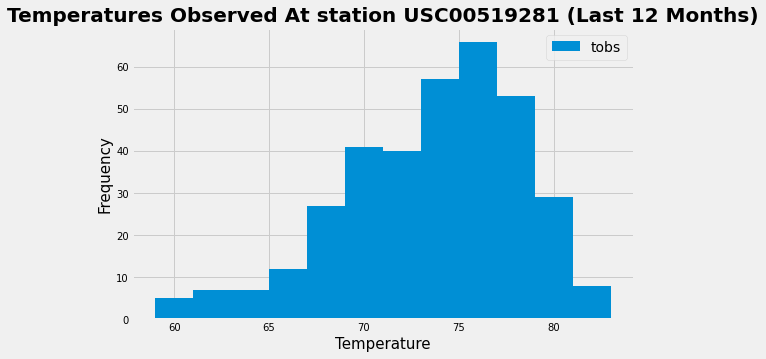

In [290]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram (Cont.)
# Plot the results as a histogram
plt.figure(figsize=(8,5))
plt.hist(np.ravel(final), bins=12)
plt.title('Temperatures Observed At station USC00519281 (Last 12 Months)',fontsize=20, fontweight = 'bold')
plt.xlabel('Temperature',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.legend(['tobs'], loc = 'upper right')
plt.yticks(size=10)
plt.xticks(size=10)

# Save Figure
plt.savefig("Images/station_plot.png")
# Show plot
plt.show()

# Close session

In [291]:
# Close Session
session.close()